In [61]:
from datetime import datetime
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
from sqlalchemy import create_engine
import psycopg2
import io
import os
from psycopg2 import connect
from plotly.subplots import make_subplots
import plotly.express as px

In [35]:
def batch(iterable, n=1):
    """Helper function that assist in managing batch sizes"""
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

In [6]:
def import_monthly():
    conn = connect(dbname = '697_temp', user = 'postgres', host = 'databasesec.cvhiyxfodl3e.us-east-2.rds.amazonaws.com', password = 'poRter!5067')
    cur = conn.cursor()
    query = "SELECT * FROM monthly"
    data = pd.read_sql_query(query,conn)
    data = data.sort_values(['Instrument', 'date'])
    data['date'] = pd.to_datetime(data['date'])
    return data

In [7]:
data = import_monthly()

In [138]:
def agg_vis(data):
    reduced = data.dropna(subset=['12m_volume'], axis = 0)
    labels = reduced.filter(['date','Instrument','1yr_ret', '3m_ret', '6m_ret'])
    features = reduced.drop(['1yr_ret', '3m_ret', '6m_ret'], axis = 1)
    corr_dat = reduced.drop(['3m_ret', '6m_ret'], axis = 1).dropna()
    corr_dat = corr_dat.groupby('date').corr()[['1yr_ret']].reset_index()
    corr_dat = corr_dat[corr_dat['level_1']!='1yr_ret']
    colors = ['rgb(136, 204, 238)', 'rgb(204, 102, 119)', 'rgb(221, 204, 119)', 'rgb(17, 119, 51)', 'rgb(51, 34, 136)',
          'rgb(170, 68, 153)', 'rgb(68, 170, 153)', 'rgb(153, 153, 51)', 'rgb(136, 34, 85)', 'rgb(102, 17, 0)',
          'rgb(136, 136, 136)']
    fig_subs = make_subplots(rows = 7, cols = 1, vertical_spacing = 0.02)
    x_dat = corr_dat['level_1'].unique()[0:10]
    y_dat = [list(corr_dat[corr_dat['level_1']==i]['1yr_ret']) for i in x_dat][0:10]
    counter = 0
    traces = dict()
    for x, y, cl in zip(x_dat, y_dat, colors[0:10]):
        traces['trace{}'.format(counter)] = go.Box(
            name = x,
            y = y,
            whiskerwidth= 0.2,
            line_width=1,
            fillcolor=cl,
             boxmean='sd'
            )
        counter+=1
    x_dat = corr_dat['level_1'].unique()[10:20]
    y_dat = [list(corr_dat[corr_dat['level_1']==i]['1yr_ret']) for i in x_dat][10:20]
    counter = 10
    for x, y, cl in zip(x_dat, y_dat, colors[0:10]):
        traces['trace{}'.format(counter)] = go.Box(
            name = x,
            y = y,
            whiskerwidth= 0.2,
            line_width=1,
            fillcolor=cl,
             boxmean='sd'
            )
        counter+=1
    print(traces)

    
    

In [139]:
agg_vis(data)

{'trace0': Box({
    'boxmean': 'sd',
    'fillcolor': 'rgb(136, 204, 238)',
    'line': {'width': 1},
    'name': '12m_volume',
    'whiskerwidth': 0.2,
    'y': [-0.021609273871529496, -0.010520304016426864, 0.008001600004227664,
          0.003214796552120444, 0.004838158484422586, -0.01319752806829959,
          -0.0012213443526607672, 0.005479204207025993, 0.2778512536357448,
          0.23219317035312279, 0.16701111239309296, 0.19344012308573588,
          0.18132893739110392, 0.17723774607498263, 0.17894876753052238,
          0.11061648391764123, 0.10240052425957051, 0.13607313072548105,
          0.12257402261335522]
}), 'trace1': Box({
    'boxmean': 'sd',
    'fillcolor': 'rgb(204, 102, 119)',
    'line': {'width': 1},
    'name': '6m_volume',
    'whiskerwidth': 0.2,
    'y': [-0.021303393788615246, -0.013621549454086867, 0.10810785088726335,
          0.10189785088502121, 0.10027566840157809, 0.1678059055747102,
          0.2045755758166923, 0.23086470794508973, 0.30478469

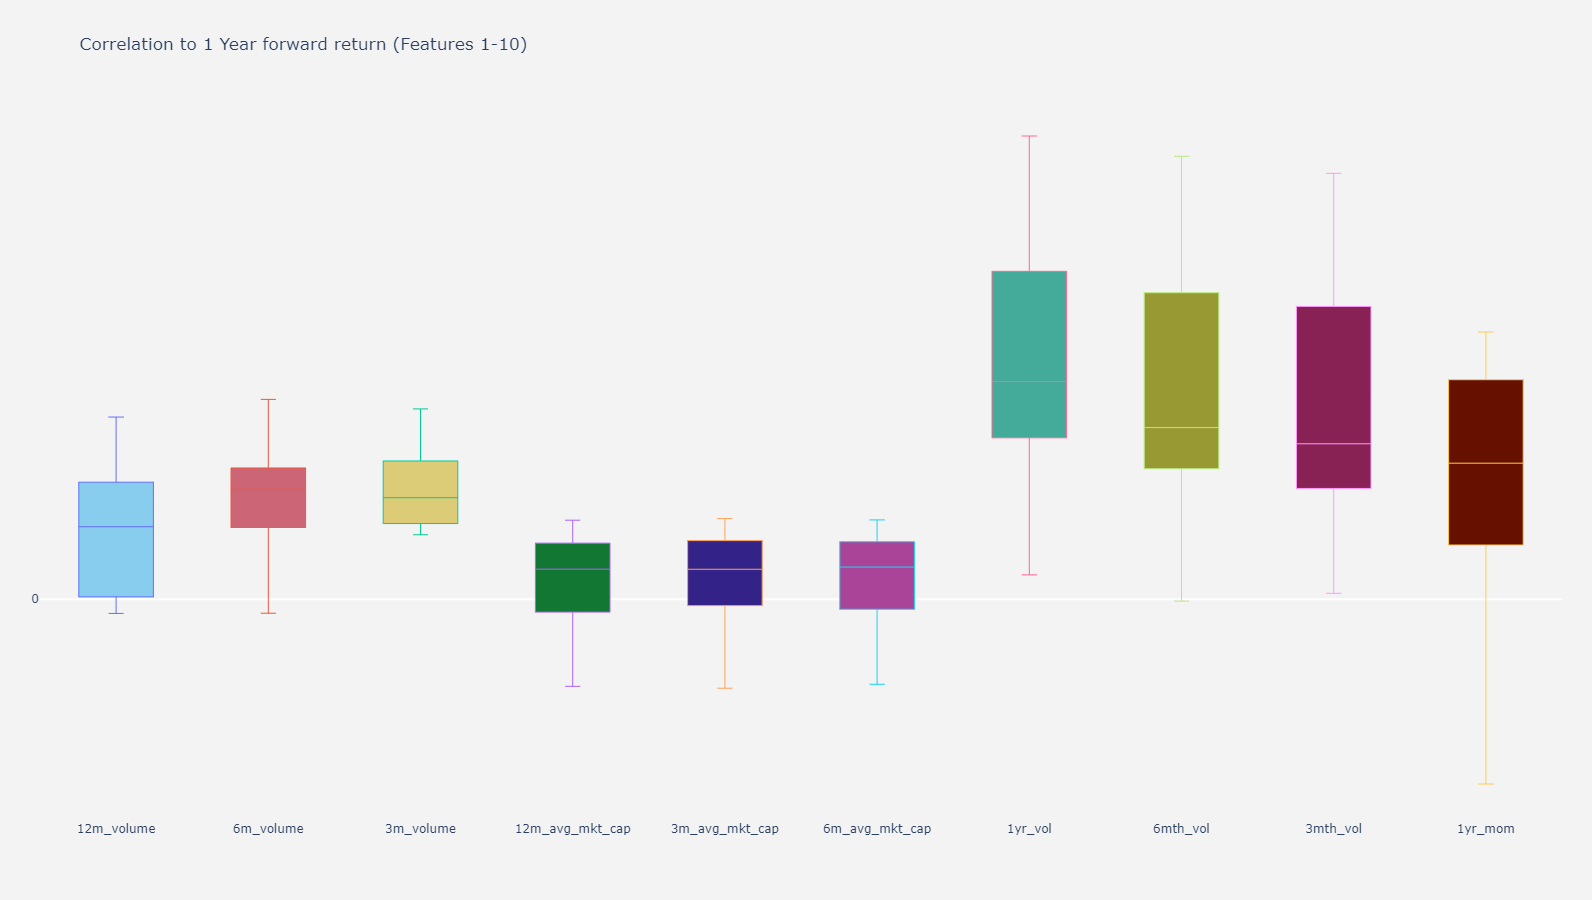

In [17]:
x_dat = corr_dat['level_1'].unique()[0:10]
y_dat = [list(corr_dat[corr_dat['level_1']==i]['1yr_ret']) for i in x_dat][0:10]
colors = ['rgb(136, 204, 238)', 'rgb(204, 102, 119)', 'rgb(221, 204, 119)', 'rgb(17, 119, 51)', 'rgb(51, 34, 136)',
          'rgb(170, 68, 153)', 'rgb(68, 170, 153)', 'rgb(153, 153, 51)', 'rgb(136, 34, 85)', 'rgb(102, 17, 0)',
          'rgb(136, 136, 136)']
fig = go.Figure()
for x, y, cl in zip(x_dat, y_dat, colors[0:10]):
    fig.add_trace(go.Box(
        y = y,
        name=x,
        #boxpoints='all',
        whiskerwidth= 0.2,
        line_width=1,
        fillcolor=cl
    ))
fig.update_layout(
    title='Correlation to 1 Year forward return (Features 1-10)',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    height = 900,
    width = 1600,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.show()

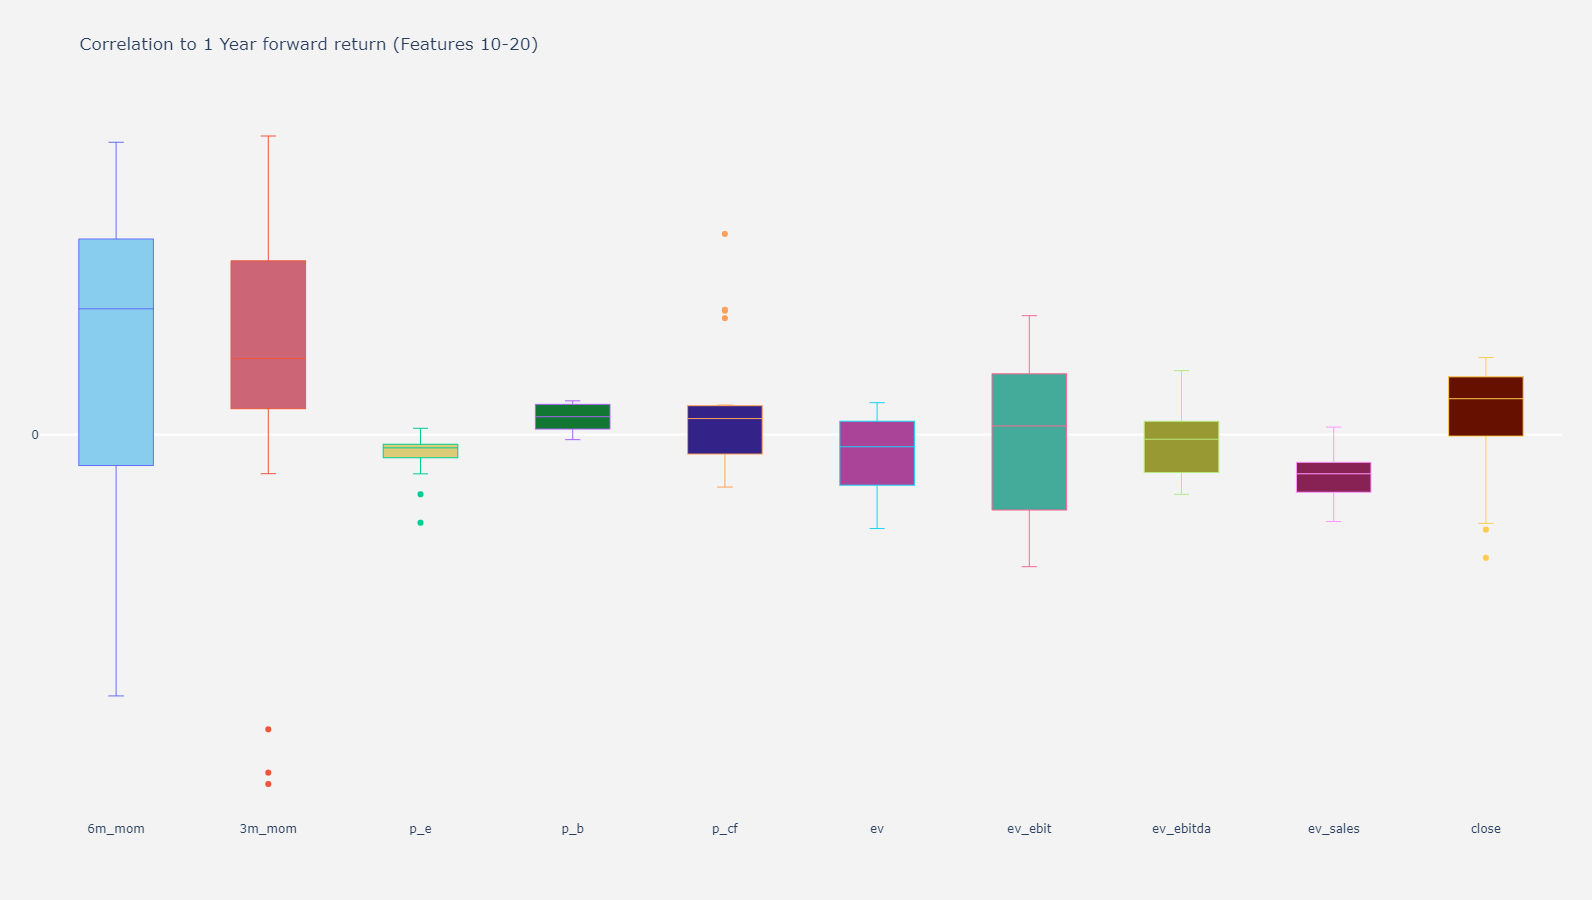

In [18]:
x_dat = corr_dat['level_1'].unique()[10:20]
y_dat = [list(corr_dat[corr_dat['level_1']==i]['1yr_ret']) for i in x_dat]
colors = ['rgb(136, 204, 238)', 'rgb(204, 102, 119)', 'rgb(221, 204, 119)', 'rgb(17, 119, 51)', 'rgb(51, 34, 136)',
          'rgb(170, 68, 153)', 'rgb(68, 170, 153)', 'rgb(153, 153, 51)', 'rgb(136, 34, 85)', 'rgb(102, 17, 0)',
          'rgb(136, 136, 136)']

fig_2 = go.Figure()
for x, y, cl in zip(x_dat, y_dat, colors[0:10]):
    fig_2.add_trace(go.Box(
        y = y,
        name=x,
        #boxpoints='all',
        whiskerwidth= 0.2,
        line_width=1,
        fillcolor=cl
    ))
fig_2.update_layout(
    title='Correlation to 1 Year forward return (Features 10-20)',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    height = 900,
    width = 1600,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig_2.show()

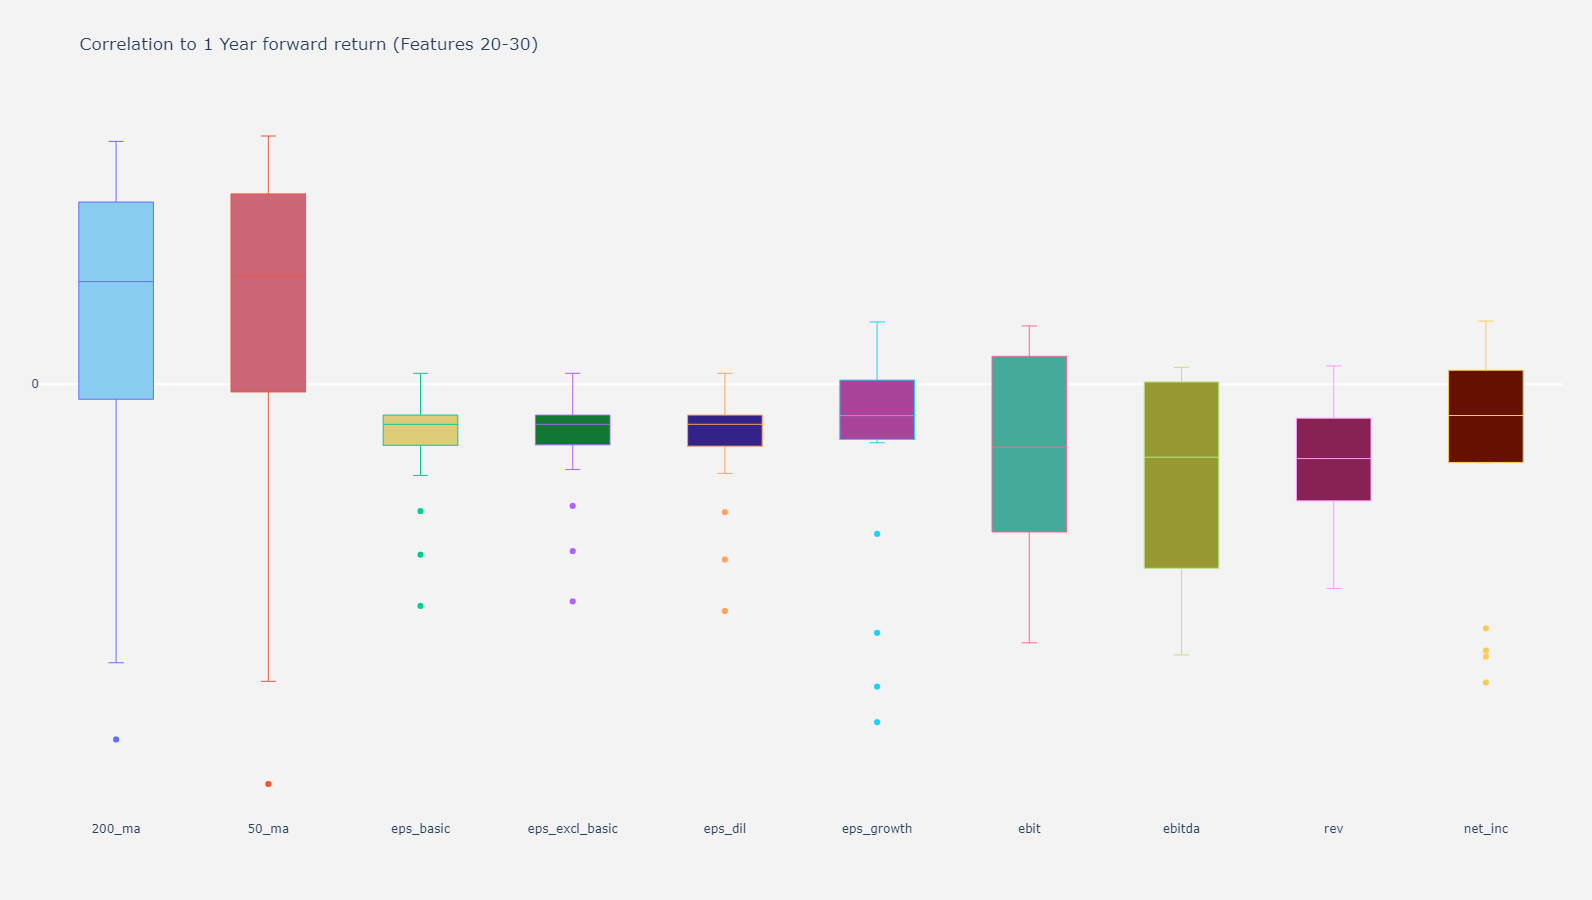

In [19]:
x_dat = corr_dat['level_1'].unique()[20:30]
y_dat = [list(corr_dat[corr_dat['level_1']==i]['1yr_ret']) for i in x_dat]
colors = ['rgb(136, 204, 238)', 'rgb(204, 102, 119)', 'rgb(221, 204, 119)', 'rgb(17, 119, 51)', 'rgb(51, 34, 136)',
          'rgb(170, 68, 153)', 'rgb(68, 170, 153)', 'rgb(153, 153, 51)', 'rgb(136, 34, 85)', 'rgb(102, 17, 0)',
          'rgb(136, 136, 136)']

fig_3 = go.Figure()
for x, y, cl in zip(x_dat, y_dat, colors[0:10]):
    fig_3.add_trace(go.Box(
        y = y,
        name=x,
        #boxpoints='all',
        whiskerwidth= 0.2,
        line_width=1,
        fillcolor=cl
    ))
fig_3.update_layout(
    title='Correlation to 1 Year forward return (Features 20-30)',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    height = 900,
    width = 1600,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig_3.show()

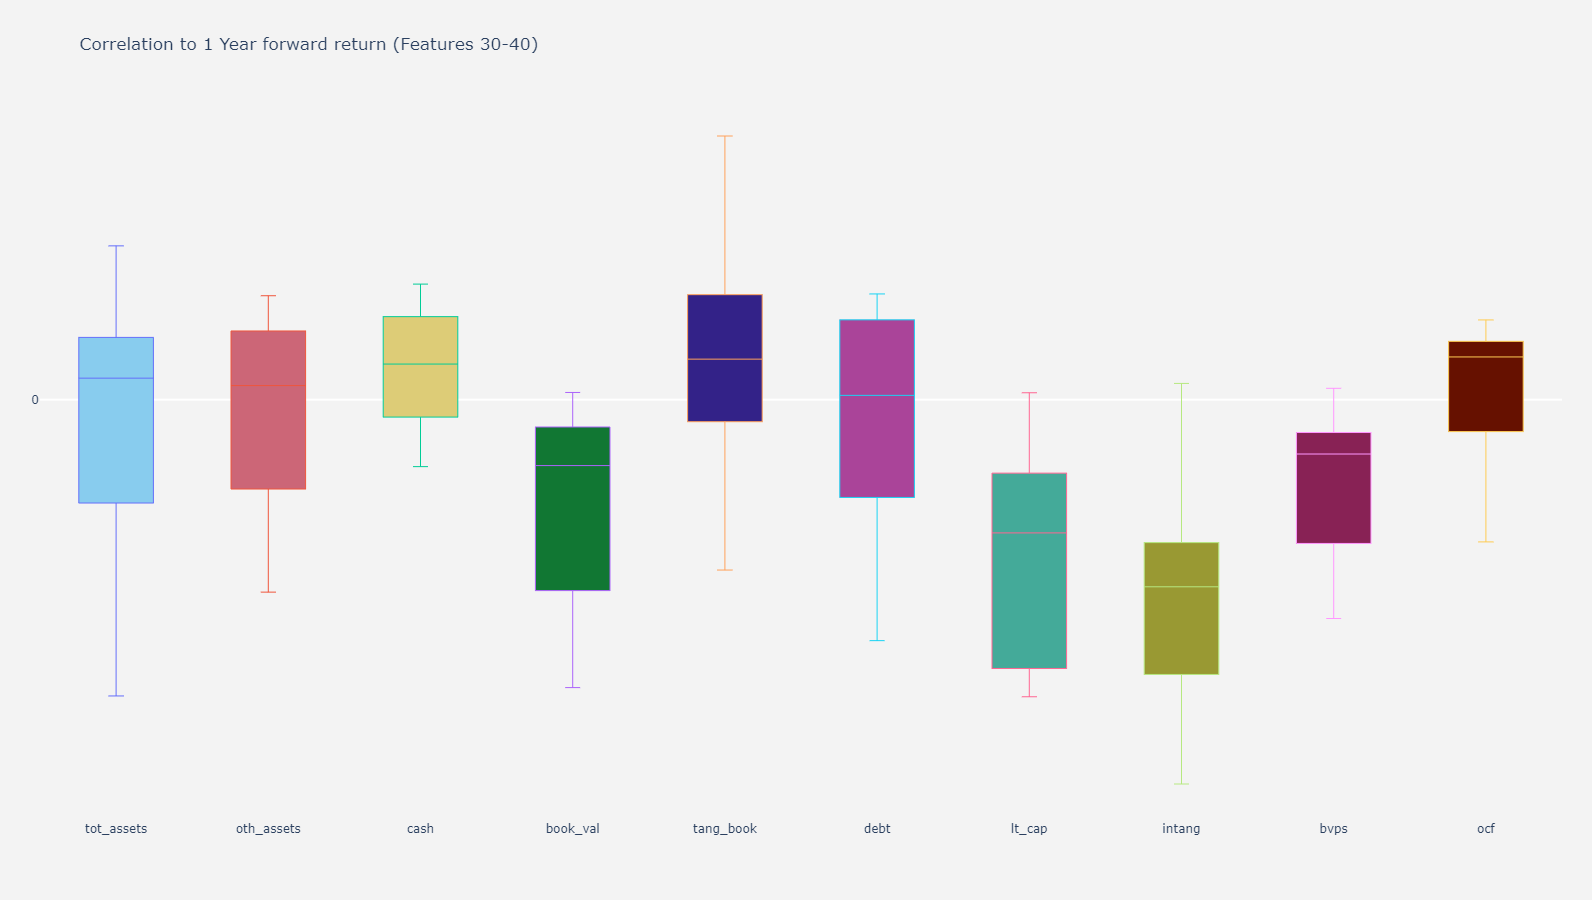

In [20]:
x_dat = corr_dat['level_1'].unique()[30:40]
y_dat = [list(corr_dat[corr_dat['level_1']==i]['1yr_ret']) for i in x_dat]
colors = ['rgb(136, 204, 238)', 'rgb(204, 102, 119)', 'rgb(221, 204, 119)', 'rgb(17, 119, 51)', 'rgb(51, 34, 136)',
          'rgb(170, 68, 153)', 'rgb(68, 170, 153)', 'rgb(153, 153, 51)', 'rgb(136, 34, 85)', 'rgb(102, 17, 0)',
          'rgb(136, 136, 136)']

fig_4 = go.Figure()
for x, y, cl in zip(x_dat, y_dat, colors[0:10]):
    fig_4.add_trace(go.Box(
        y = y,
        name=x,
        #boxpoints='all',
        whiskerwidth= 0.2,
        line_width=1,
        fillcolor=cl
    ))
fig_4.update_layout(
    title='Correlation to 1 Year forward return (Features 30-40)',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    height = 900,
    width = 1600,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig_4.show()


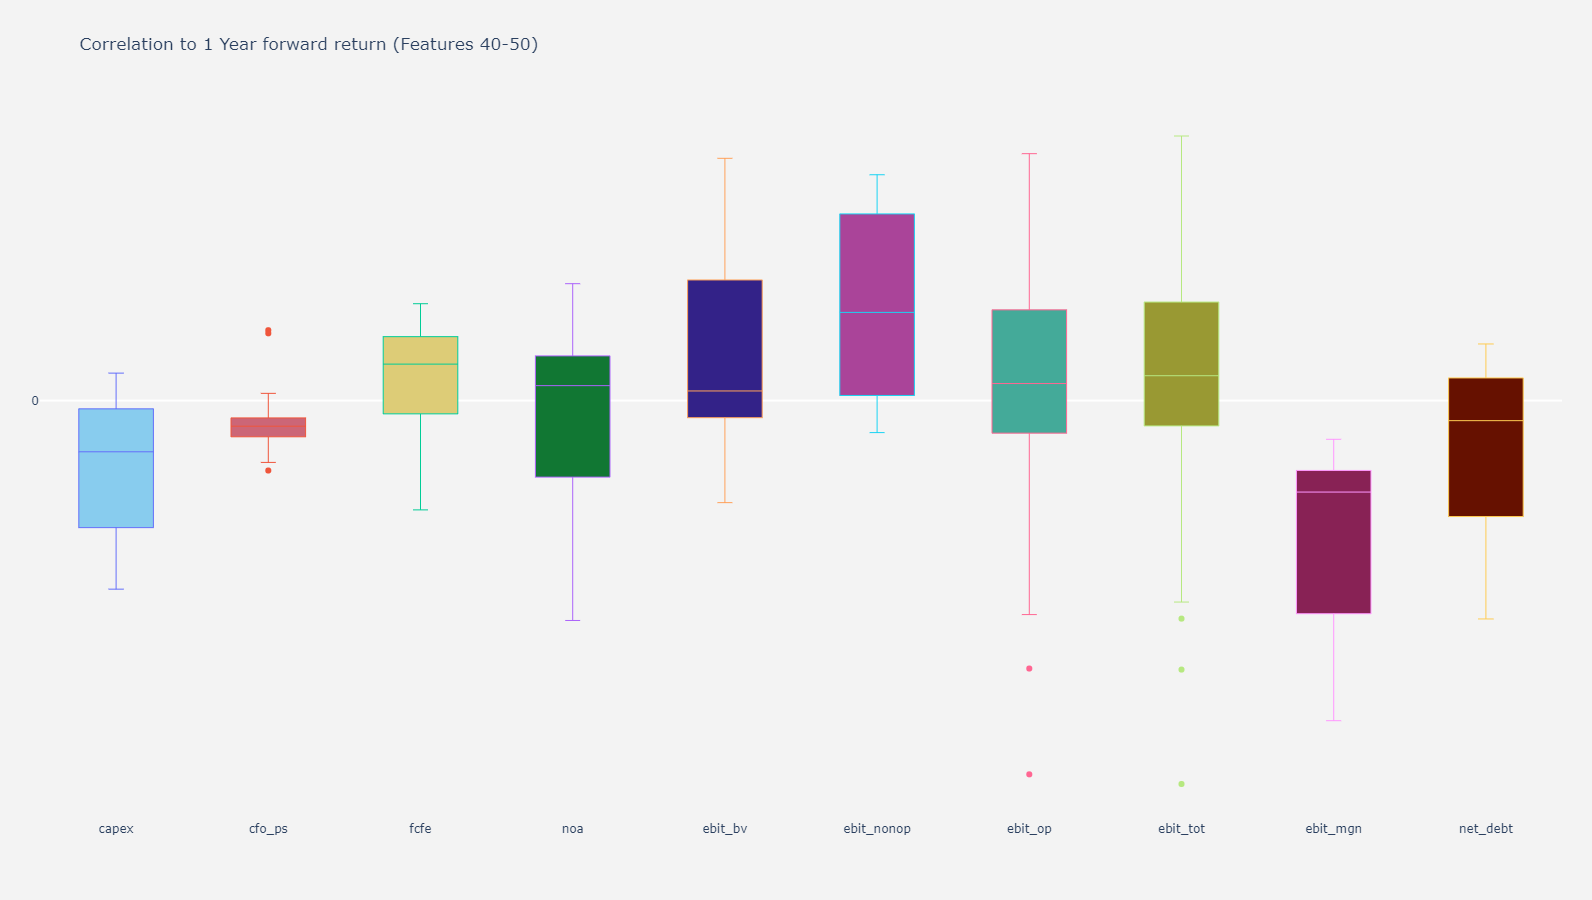

In [21]:
x_dat = corr_dat['level_1'].unique()[40:50]
y_dat = [list(corr_dat[corr_dat['level_1']==i]['1yr_ret']) for i in x_dat]
colors = ['rgb(136, 204, 238)', 'rgb(204, 102, 119)', 'rgb(221, 204, 119)', 'rgb(17, 119, 51)', 'rgb(51, 34, 136)',
          'rgb(170, 68, 153)', 'rgb(68, 170, 153)', 'rgb(153, 153, 51)', 'rgb(136, 34, 85)', 'rgb(102, 17, 0)',
          'rgb(136, 136, 136)']

fig_5 = go.Figure()
for x, y, cl in zip(x_dat, y_dat, colors[0:10]):
    fig_5.add_trace(go.Box(
        y = y,
        name=x,
        #boxpoints='all',
        whiskerwidth= 0.2,
        line_width=1,
        fillcolor=cl
    ))
fig_5.update_layout(
    title='Correlation to 1 Year forward return (Features 40-50)',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    height = 900,
    width = 1600,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig_5.show()

In [ ]:
x_dat = corr_dat['level_1'].unique()[50:60]
y_dat = [list(corr_dat[corr_dat['level_1']==i]['1yr_ret']) for i in x_dat]
colors = ['rgb(136, 204, 238)', 'rgb(204, 102, 119)', 'rgb(221, 204, 119)', 'rgb(17, 119, 51)', 'rgb(51, 34, 136)',
          'rgb(170, 68, 153)', 'rgb(68, 170, 153)', 'rgb(153, 153, 51)', 'rgb(136, 34, 85)', 'rgb(102, 17, 0)',
          'rgb(136, 136, 136)']

fig_6 = go.Figure()
for x, y, cl in zip(x_dat, y_dat, colors[0:10]):
    fig_6.add_trace(go.Box(
        y = y,
        name=x,
        #boxpoints='all',
        whiskerwidth= 0.2,
        line_width=1,
        fillcolor=cl
    ))
fig_6.update_layout(
    title='Correlation to 1 Year forward return (Features 40-50)',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

pio.write_html(fig_6, file='assets/visualizations/cor_6.html', auto_open=False)


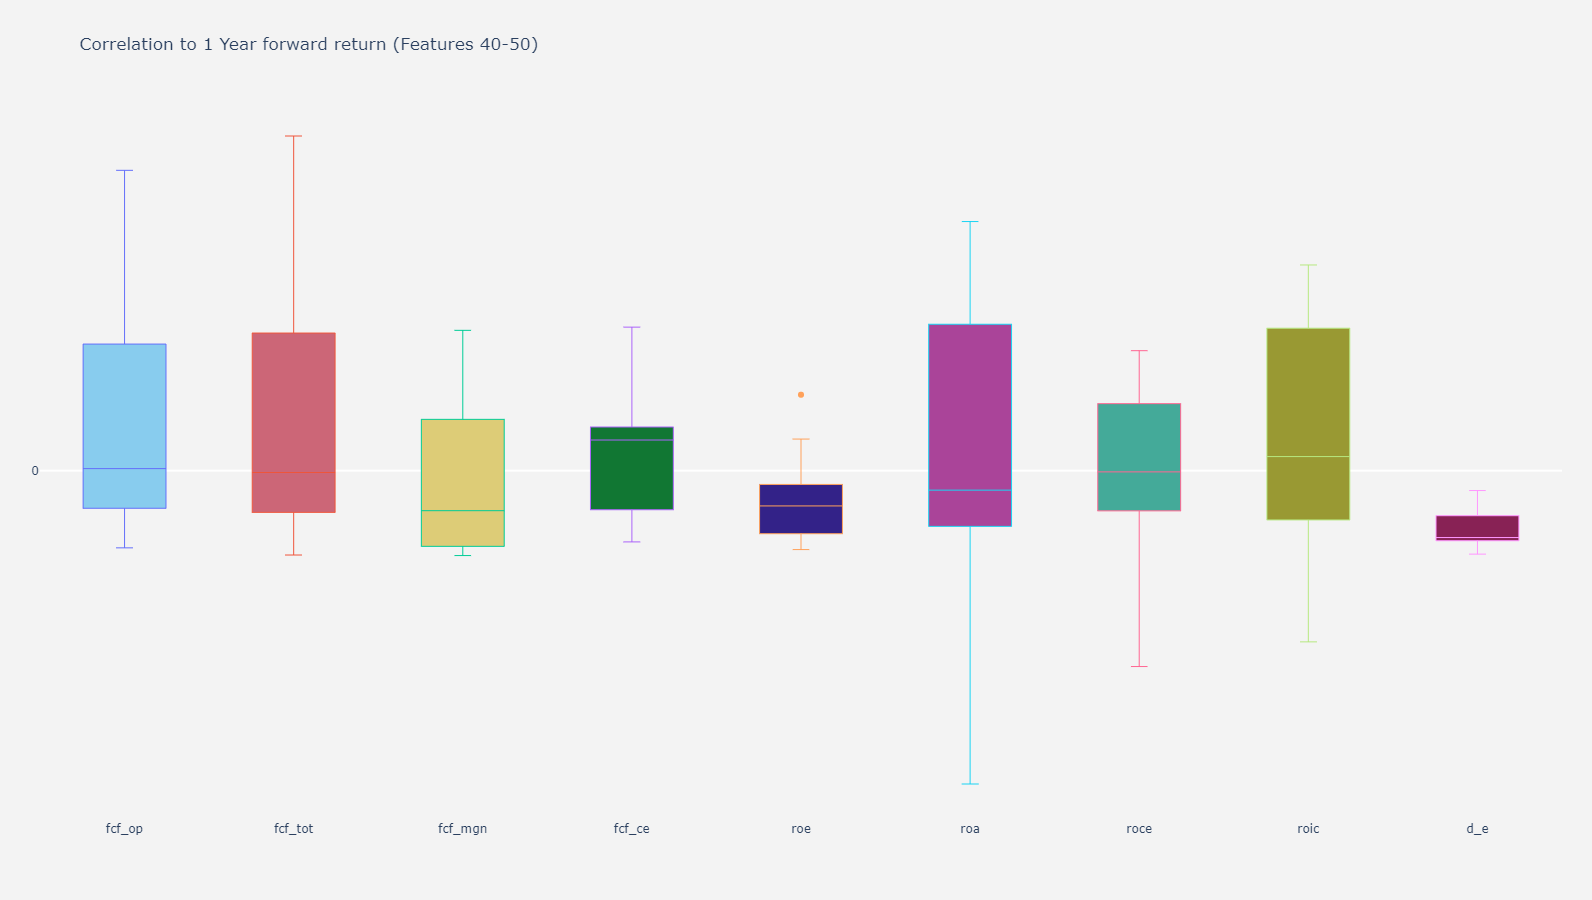

In [22]:
x_dat = corr_dat['level_1'].unique()[60:]
y_dat = [list(corr_dat[corr_dat['level_1']==i]['1yr_ret']) for i in x_dat]
colors = ['rgb(136, 204, 238)', 'rgb(204, 102, 119)', 'rgb(221, 204, 119)', 'rgb(17, 119, 51)', 'rgb(51, 34, 136)',
          'rgb(170, 68, 153)', 'rgb(68, 170, 153)', 'rgb(153, 153, 51)', 'rgb(136, 34, 85)', 'rgb(102, 17, 0)',
          'rgb(136, 136, 136)']

fig_7 = go.Figure()
for x, y, cl in zip(x_dat, y_dat, colors[0:10]):
    fig_7.add_trace(go.Box(
        y = y,
        name=x,
        #boxpoints='all',
        whiskerwidth= 0.2,
        line_width=1,
        fillcolor=cl
    ))
fig_7.update_layout(
    title='Correlation to 1 Year forward return (Features 40-50)',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    height = 900,
    width = 1600,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig_7.show()


In [24]:
corr = reduced.drop(['3m_ret', '6m_ret'], axis = 1).dropna()
corr = corr.corr()

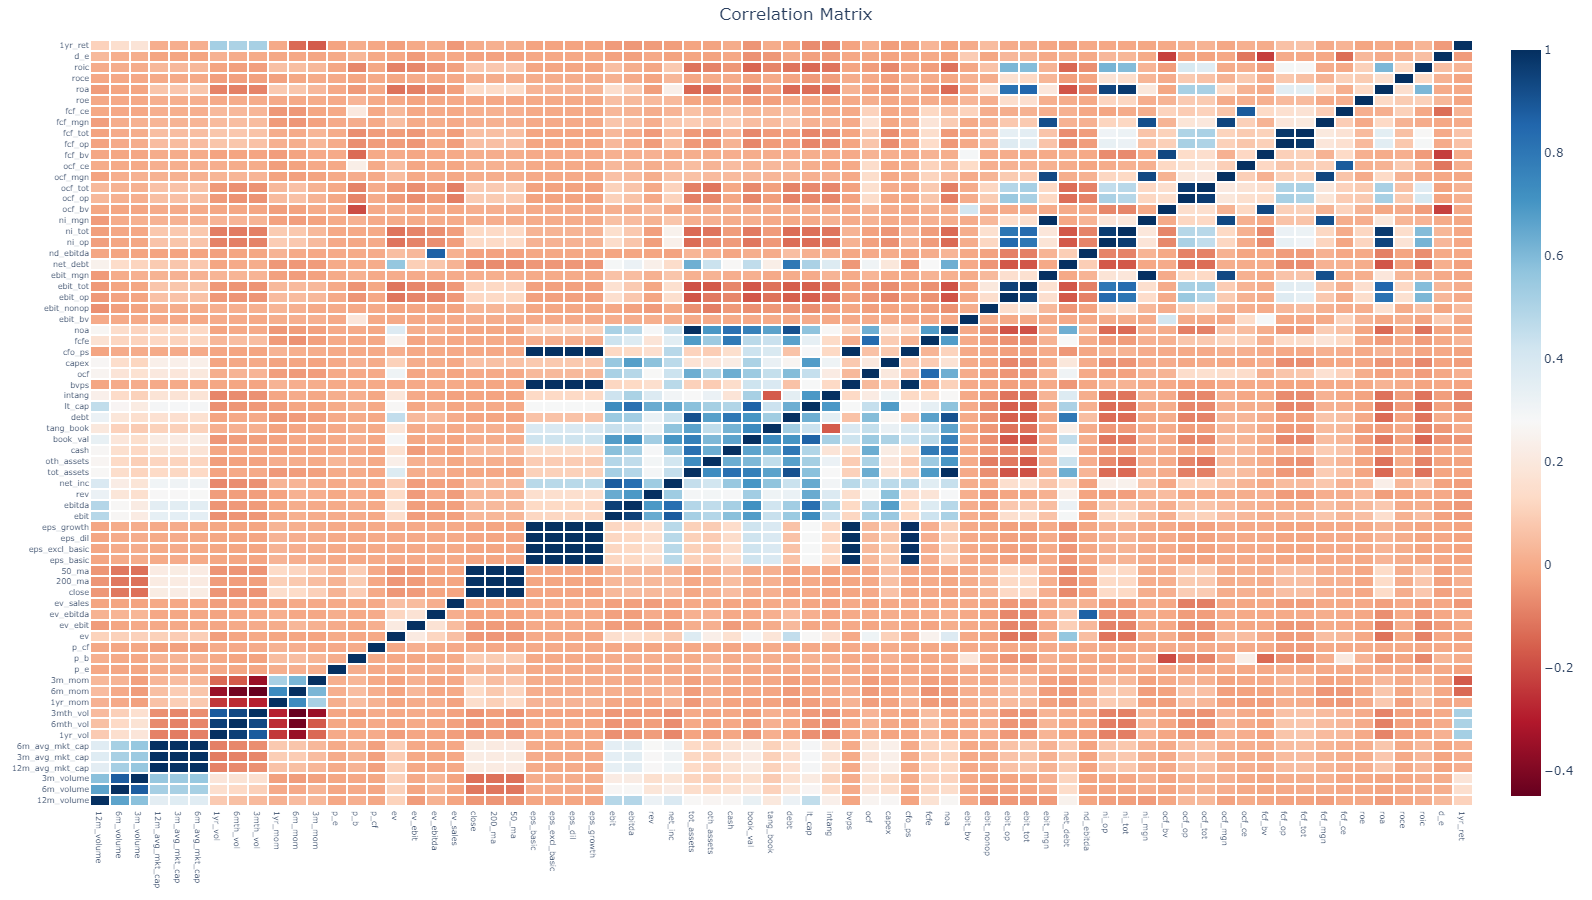

In [25]:
fig = go.Figure(data=go.Heatmap(
    z = corr,
    x = corr.index,
    y = corr.columns,
    xgap =2,
    ygap =2,
    colorscale="RdBu"

    ))

fig.update_layout(
    title = "Correlation Matrix",
    title_x = 0.5,
    paper_bgcolor='white',
    plot_bgcolor='white',
    height = 900,
    width = 900,
    margin=dict(
        l=30,
        r=30,
        b=30,
        t=40,
    ),
)
fig.update_xaxes(tickfont = dict(size = 8))
fig.update_yaxes(tickfont = dict(size = 8))
fig.show()